# **Atividade 1 - Transformações Lineares**

In [2]:
import sys

sys.path.append('../')

Importamos a função `plot_vectors` para criar as visualizações gráficas e o `numpy` para realizar os cálculos matriciais.

In [3]:
import numpy as np

from src.utils.plot_vectors import plot_vectors

## 1.1 Aplicação das Duas Transformações

Usamos os 2 vetores unitários para a aplicação das transformações.

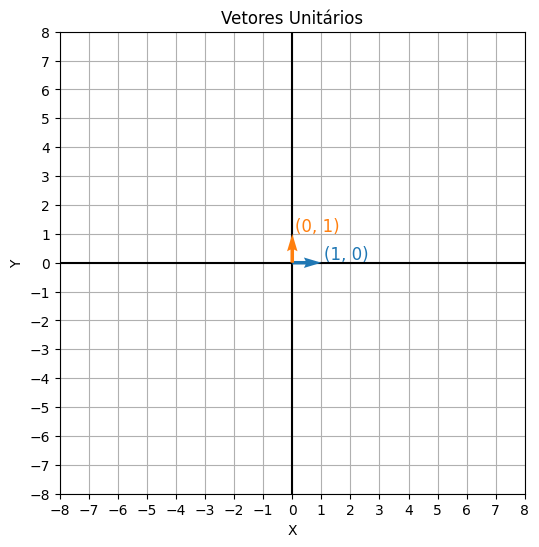

In [4]:
vectors = np.array([[1, 0], [0, 1]])

plot_vectors(
    ['Vetores Unitários'],
    [vectors],
    comparison=False,
    determinant=False,
)

A seguir estão a matriz de rotação horária de 90° e de shear horizontal com $k = 2$.

$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
S_x =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
$$

In [5]:
def get_shear_matrix(k: float) -> np.ndarray:
    return np.array([[1, k], [0, 1]])


rotation_matrix = np.array([[0, 1], [-1, 0]])
shear_matrix = get_shear_matrix(2)

### 1.1.1 Rotação Horária de 90° + *Shear* Horizontal

#### Procedimento 1

$$
S_xR =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
=
\begin{bmatrix}
-2 & 1\\
-1 & 0
\end{bmatrix}
$$

Matriz de Vetores Unitários:
[[1 0]
 [0 1]]
Matriz de Vetores Unitários Após Rotação Horária de 90°:
[[ 0  1]
 [-1  0]]
Matriz de Vetores Unitários Após Rotação Horária de 90° e Shear Horizontal:
[[-2  1]
 [-1  0]]


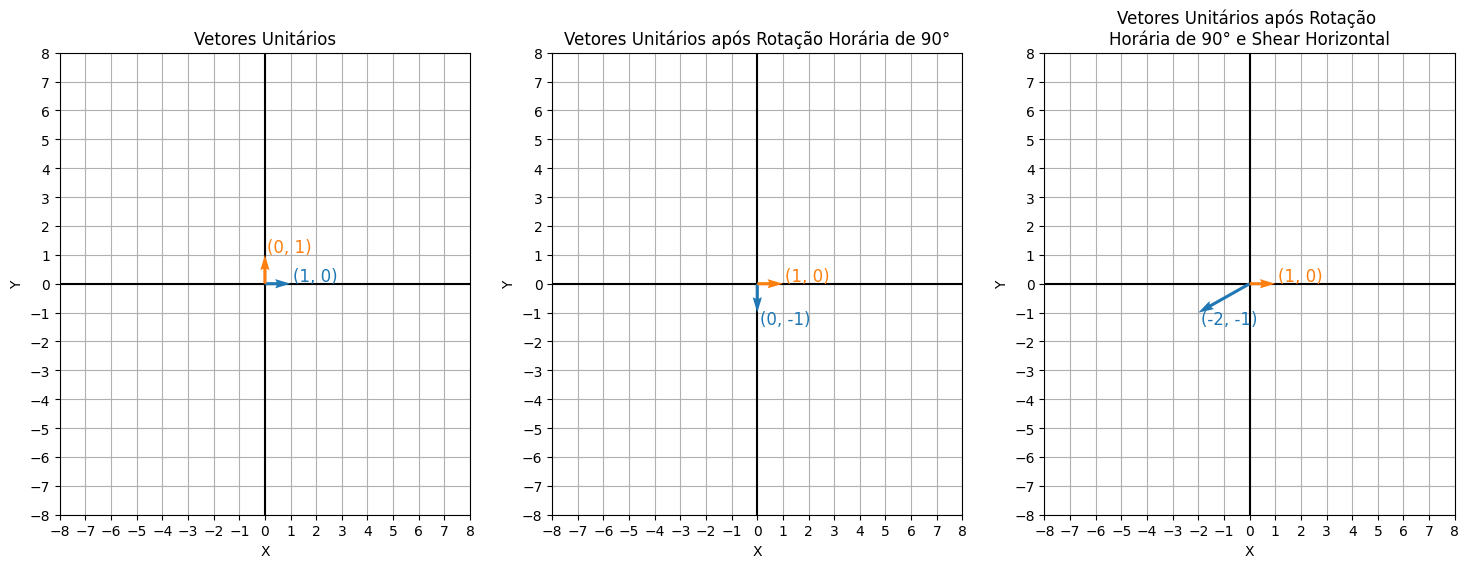

In [ ]:
rotationed_vectors = np.array([rotation_matrix @ vector for vector in vectors])
rotationed_sheared_vectors = np.array([shear_matrix @ vector for vector in rotationed_vectors])

print('Matriz de Vetores Unitários:')
print(vectors.T)

print('Matriz de Vetores Unitários Após Rotação Horária de 90°:')
print(rotationed_vectors.T)

print('Matriz de Vetores Unitários Após Rotação Horária de 90° e Shear Horizontal:')
print(rotationed_sheared_vectors.T)

plot_vectors(
    [
        'Vetores Unitários',
        'Vetores Unitários após Rotação Horária de 90°',
        'Vetores Unitários após Rotação \nHorária de 90° e Shear Horizontal',
    ],
    [vectors, rotationed_vectors, rotationed_sheared_vectors],
    comparison=True,
    determinant=False,
)

#### Procedimento 2

$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
S_x =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
$$

$$
S_xR =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$

$$
\begin{bmatrix}
a \\
c
\end{bmatrix}
=
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
=
0
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+
(-1)
\begin{bmatrix}
2 \\
1
\end{bmatrix}
=
\begin{bmatrix}
-2 \\
-1
\end{bmatrix}
$$

$$
\begin{bmatrix}
b \\
d
\end{bmatrix}
=
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
1
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+
0
\begin{bmatrix}
2 \\
1
\end{bmatrix}
=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

$$
S_xR =
\begin{bmatrix}
-2 & 1\\
-1 & 0
\end{bmatrix}
$$

In [45]:
rotationed_sheared_vectors = []

for column_rotation in rotation_matrix.T:
    temp_vectors = []
    for number, column_shear in zip(column_rotation, shear_matrix.T, strict=True):
        temp_vector = [number * value for value in column_shear]
        temp_vectors.append(temp_vector)

    temp_vector = [0 for _ in range(len(temp_vectors))]
    for i in range(len(temp_vectors)):
        for j in range(len(temp_vectors[0])):
            temp_vector[j] += temp_vectors[i][j]
    rotationed_sheared_vectors.append(temp_vector)

rotationed_sheared_vectors = np.array(rotationed_sheared_vectors)

Matriz de Vetores Unitários:
[[1 0]
 [0 1]]
Matriz de Vetores Unitários Após Rotação Horária de 90° e Shear Horizontal°:
[[-2  1]
 [-1  0]]


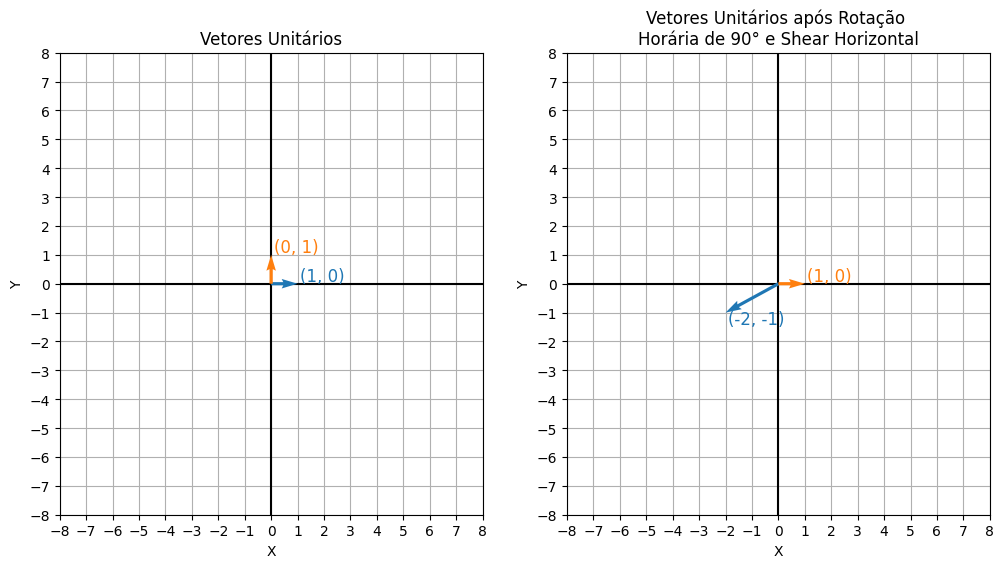

In [8]:
print('Matriz de Vetores Unitários:')
print(vectors.T)

print('Matriz de Vetores Unitários Após Rotação Horária de 90° e Shear Horizontal°:')
print(rotationed_sheared_vectors.T)

plot_vectors(
    [
        'Vetores Unitários',
        'Vetores Unitários após Rotação \nHorária de 90° e Shear Horizontal',
    ],
    [vectors, rotationed_sheared_vectors],
    comparison=True,
    determinant=False,
)

#### Determinante

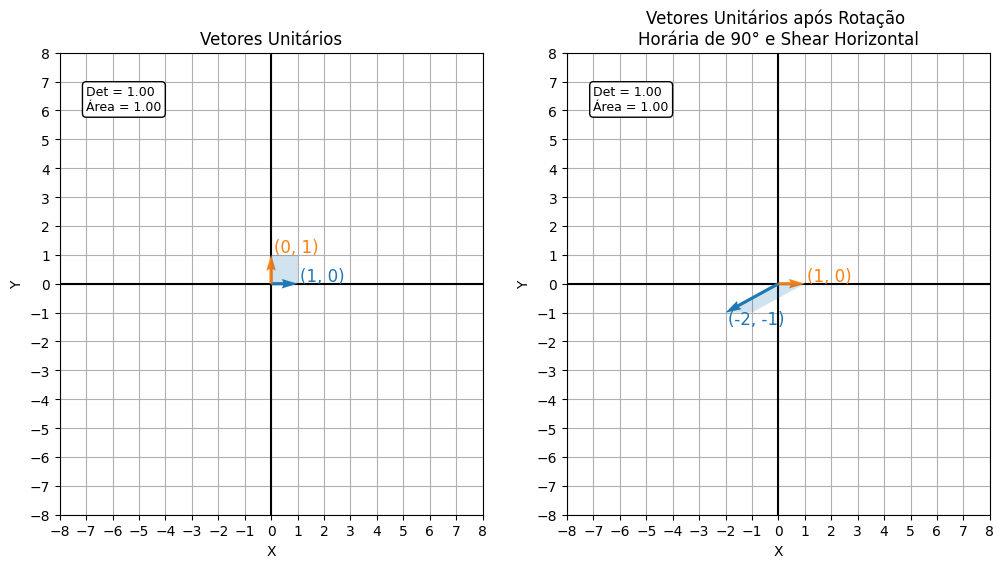

In [9]:
plot_vectors(
    [
        'Vetores Unitários',
        'Vetores Unitários após Rotação \nHorária de 90° e Shear Horizontal',
    ],
    [vectors, rotationed_sheared_vectors],
    comparison=True,
    determinant=True,
)

Observe que a área e o determinante antes da transformação era igual 1. Após a transformação, a área e o determinante se mantiveram iguais. Logo, a transformação não causou mudanças na área do paralelogramo delimitada pelos vetores.

### 1.1.2 *Shear* Horizontal + Rotação Horária de 90°

#### Procedimento 1

$$
RS_x =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-1 & -2
\end{bmatrix}
$$

Matriz de Vetores Unitários:
[[1 0]
 [0 1]]
Matriz de Vetores Unitários após Shear Horizontal:
[[1 2]
 [0 1]]
Matriz de Vetores Unitários Após Shear Horizontal e Rotação Horária de 90°:
[[ 0  1]
 [-1 -2]]


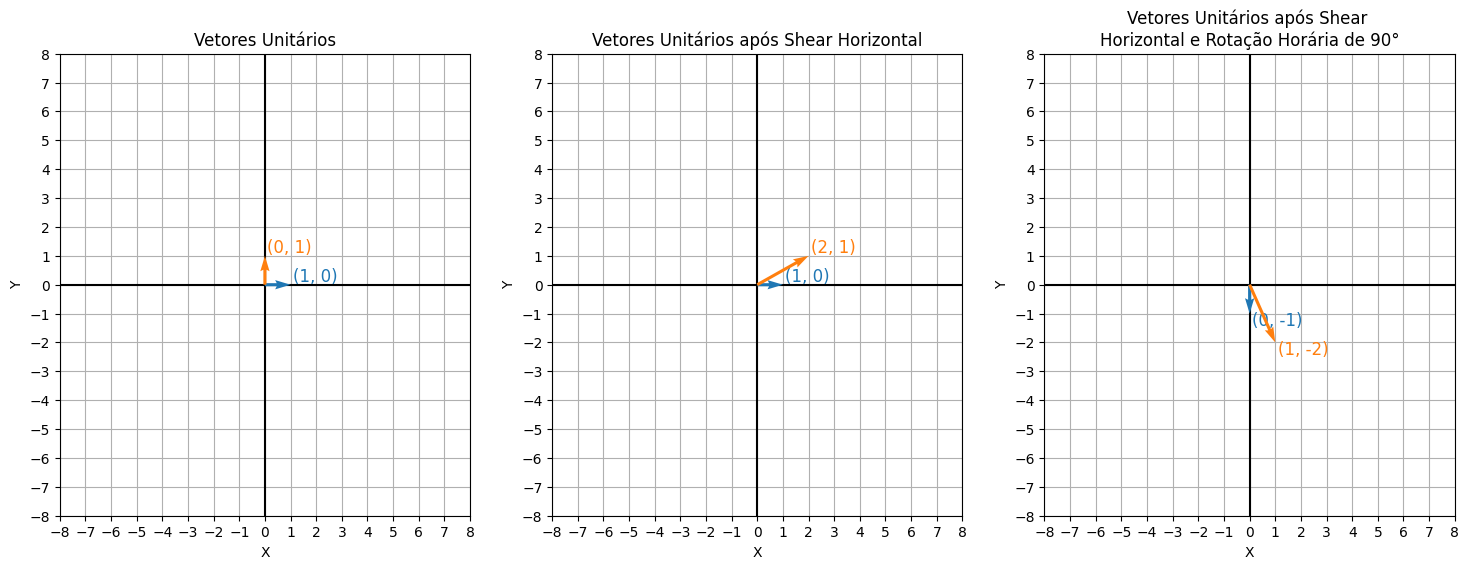

In [10]:
sheared_vectors = np.array([shear_matrix @ vector for vector in vectors])
sheared_rotationed_vectors = np.array([rotation_matrix @ vector for vector in sheared_vectors])

print('Matriz de Vetores Unitários:')
print(vectors.T)

print('Matriz de Vetores Unitários após Shear Horizontal:')
print(sheared_vectors.T)

print('Matriz de Vetores Unitários Após Shear Horizontal e Rotação Horária de 90°:')
print(sheared_rotationed_vectors.T)

plot_vectors(
    [
        'Vetores Unitários',
        'Vetores Unitários após Shear Horizontal',
        'Vetores Unitários após Shear \nHorizontal e Rotação Horária de 90°',
    ],
    [vectors, sheared_vectors, sheared_rotationed_vectors],
    comparison=True,
    determinant=False,
)

#### Procedimento 2

$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
S_x =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
$$

$$
RS_x =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
$$

$$
\begin{bmatrix}
a \\
c
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
1
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
+
0
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
$$

$$
\begin{bmatrix}
b \\
d
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
2 \\
1
\end{bmatrix}
=
2
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
+
1
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
1 \\
-2
\end{bmatrix}
$$

$$
RS_x =
\begin{bmatrix}
0 & 1\\
-1 & -2
\end{bmatrix}
$$

In [ ]:
sheared_rotationed_vectors = []

for column_shear in shear_matrix.T:
    temp_vectors = []
    for number, column_rotation in zip(column_shear, rotation_matrix.T, strict=True):
        temp_vector = [number * value for value in column_rotation]
        temp_vectors.append(temp_vector)

    temp_vector = [0 for _ in range(len(temp_vectors))]
    for i in range(len(temp_vectors)):
        for j in range(len(temp_vectors[0])):
            temp_vector[j] += temp_vectors[i][j]
    sheared_rotationed_vectors.append(temp_vector)

sheared_rotationed_vectors = np.array(sheared_rotationed_vectors)

[[ 0  1]
 [-1 -2]]


Matriz de Vetores Unitários:
[[1 0]
 [0 1]]
Matriz de Vetores Unitários Após Shear Horizontal e Rotação Horária de 90°:
[[ 0  1]
 [-1 -2]]


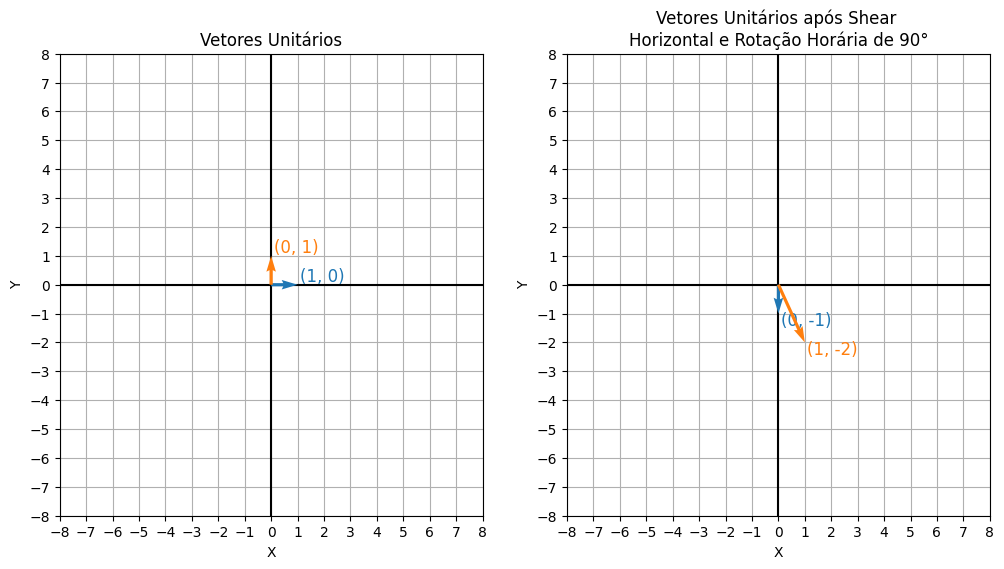

In [12]:
print('Matriz de Vetores Unitários:')
print(vectors.T)

print('Matriz de Vetores Unitários Após Shear Horizontal e Rotação Horária de 90°:')
print(sheared_rotationed_vectors.T)

plot_vectors(
    [
        'Vetores Unitários',
        'Vetores Unitários após Shear \nHorizontal e Rotação Horária de 90°',
    ],
    [vectors, sheared_rotationed_vectors],
    comparison=True,
    determinant=False,
)

#### Determinante

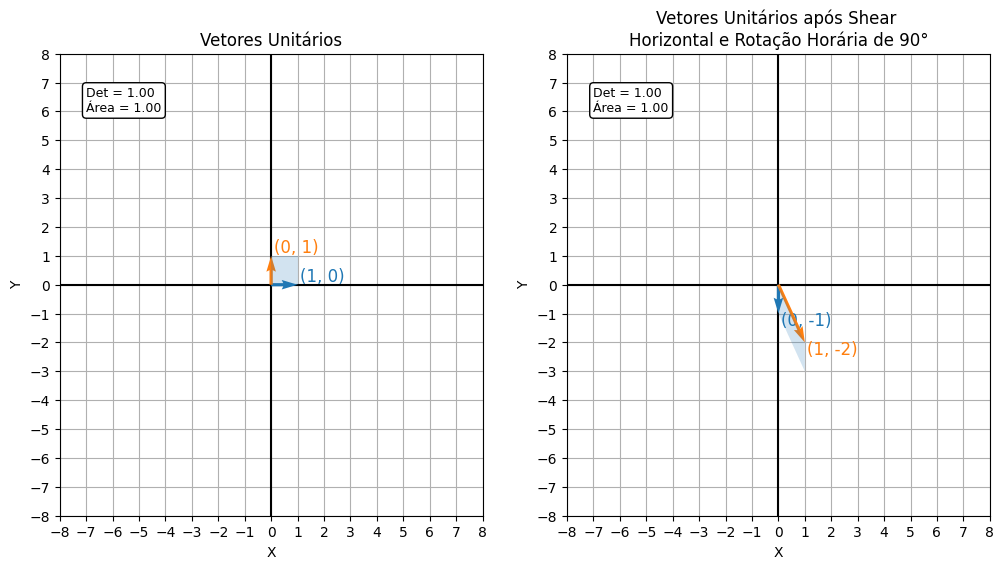

In [13]:
plot_vectors(
    [
        'Vetores Unitários',
        'Vetores Unitários após Shear \nHorizontal e Rotação Horária de 90°',
    ],
    [vectors, sheared_rotationed_vectors],
    comparison=True,
    determinant=True,
)

Observe que a área e o determinante antes da transformação era igual 1. Após a transformação, a área e o determinante se mantiveram iguais. Logo, a transformação não causou mudanças na área do paralelogramo delimitada pelos vetores.

## 1.2 Produto Escalar entre Dois Vetores

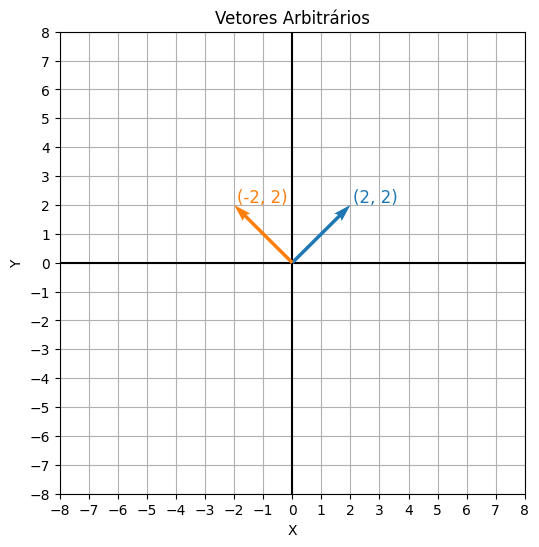

In [ ]:
vector = np.array([2, 2])
orthogonal_vector = vector @ rotation_matrix
vectors = np.array([vector, orthogonal_vector])

plot_vectors(['Vetores Arbitrários'], [vectors], comparison=False, determinant=False)

In [ ]:
np.dot(vector, orthogonal_vector)

np.int64(0)

Como os vetores são ortogonais, não há como fazer a projeção do primeiro no segundo, então o produto escalar é 0. Implicando que não há similaridade entre os dois vetores.

## 1.3 Análise de Código

In [42]:
v1 = np.array([1, 2])
v2 = np.array([4, 5])

dot = np.dot(v1, v2)

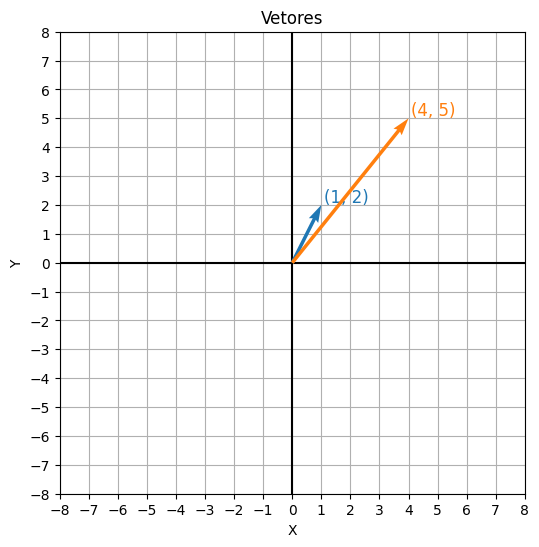

In [44]:
vectors = np.array([v1, v2])
plot_vectors(['Vetores'], [vectors], comparison=False, determinant=False)

In [43]:
dot

np.int64(14)

Observe que os vetores estão bem próximos e apontam para uma direção bem parecida, implicando que há muita semelhança entre os dois, e o produto escalar mostra essa similaridade através do resultado 14, analisando o gráfico podemos concluir que 14 é um valor até que alto para o produto escalar entre esses dois vetores.